In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [7]:
#Load data:
prices_day_1 = pd.read_csv(r"C:\Users\Usuario1\Desktop\quant\IMC_Prosperity\Round4\round-4-island-data-bottle\observations_round_4_day_1.csv",sep =",")
prices_day_2 =pd.read_csv(r"C:\Users\Usuario1\Desktop\quant\IMC_Prosperity\Round4\round-4-island-data-bottle\observations_round_4_day_2.csv",sep =",")
prices_day_3 = pd.read_csv(r"C:\Users\Usuario1\Desktop\quant\IMC_Prosperity\Round4\round-4-island-data-bottle\observations_round_4_day_3.csv",sep =",")
prices_day_1["day"] = 1
prices_day_2["day"] = 2
prices_day_3["day"] = 0
prices = pd.concat([prices_day_1, prices_day_2, prices_day_3], axis=0)
prices.sort_values(by=["day","timestamp"],inplace=True)
prices.reset_index(drop=True, inplace=True)

In [ ]:
observations_1 = pd.read_csv(r"C:\Users\Usuario1\Desktop\quant\IMC_Prosperity\Round4\round-4-island-data-bottle\observations_round_4_day_1.csv",sep =",")
observations_2 = pd.read_csv(r"C:\Users\Usuario1\Desktop\quant\IMC_Prosperity\Round4\round-4-island-data-bottle\observations_round_4_day_2.csv",sep =",")   
observations_3 = pd.read_csv(r"C:\Users\Usuario1\Desktop\quant\IMC_Prosperity\Round4\round-4-island-data-bottle\observations_round_4_day_3.csv",sep =",")
observations_1["day"] = 1
observations_2["day"] = 2
observations_3["day"] = 0
observations = pd.concat([observations_1, observations_2, observations_3], axis=0)
observations.sort_values(by=["day","timestamp"],inplace=True)
observations.reset_index(drop=True, inplace=True)
#Okay same than prices ?????

In [94]:
observations

,timestamp,bidPrice,askPrice,transportFees,exportTariff,importTariff,sugarPrice,sunlightIndex,day
0,0,671.0,672.5,2.1,10.0,-3.0,199.000000,55.00,0
1,100,672.0,673.5,2.1,10.0,-3.0,199.064089,55.00,0
2,200,668.5,670.0,2.1,10.0,-3.0,198.783168,55.01,0
3,300,668.5,670.0,2.1,10.0,-3.0,198.545120,55.02,0
4,400,668.0,669.5,2.1,10.0,-3.0,198.455261,55.02,0
...,...,...,...,...,...,...,...,...,...
29995,999500,675.5,677.0,2.1,10.0,-3.0,198.132272,54.99,2
29996,999600,670.5,672.0,2.1,10.0,-3.0,197.899374,54.99,2
29997,999700,670.0,672.0,2.1,10.0,-3.0,197.900115,54.99,2
29998,999800,668.5,670.0,2.1,10.0,-3.0,198.192381,55.00,2


In [13]:
prices

,timestamp,bidPrice,askPrice,transportFees,exportTariff,importTariff,sugarPrice,sunlightIndex,day
0,0,671.0,672.5,2.1,10.0,-3.0,199.000000,55.00,0
1,100,672.0,673.5,2.1,10.0,-3.0,199.064089,55.00,0
2,200,668.5,670.0,2.1,10.0,-3.0,198.783168,55.01,0
3,300,668.5,670.0,2.1,10.0,-3.0,198.545120,55.02,0
4,400,668.0,669.5,2.1,10.0,-3.0,198.455261,55.02,0
...,...,...,...,...,...,...,...,...,...
29995,999500,675.5,677.0,2.1,10.0,-3.0,198.132272,54.99,2
29996,999600,670.5,672.0,2.1,10.0,-3.0,197.899374,54.99,2
29997,999700,670.0,672.0,2.1,10.0,-3.0,197.900115,54.99,2
29998,999800,668.5,670.0,2.1,10.0,-3.0,198.192381,55.00,2


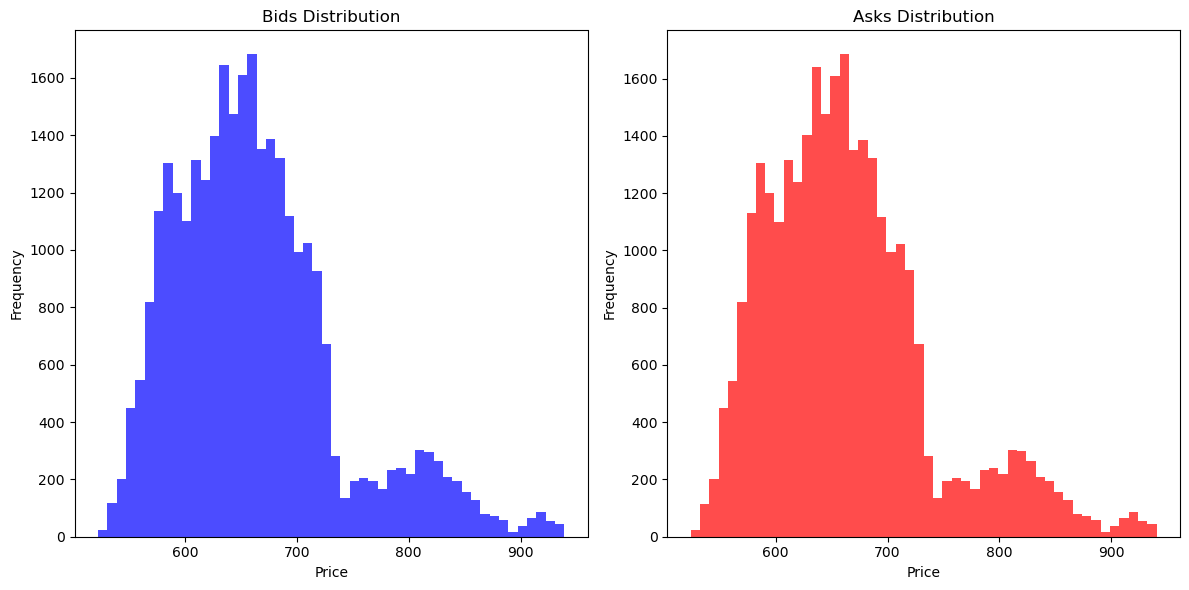

In [14]:
#Plot bids and asks distributions side by side:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.hist(prices['bidPrice'], bins=50, alpha=0.7, color='blue', label='Bids')
plt.title('Bids Distribution')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.subplot(1, 2, 2)
plt.hist(prices['askPrice'], bins=50, alpha=0.7, color='red', label='Asks')
plt.title('Asks Distribution')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

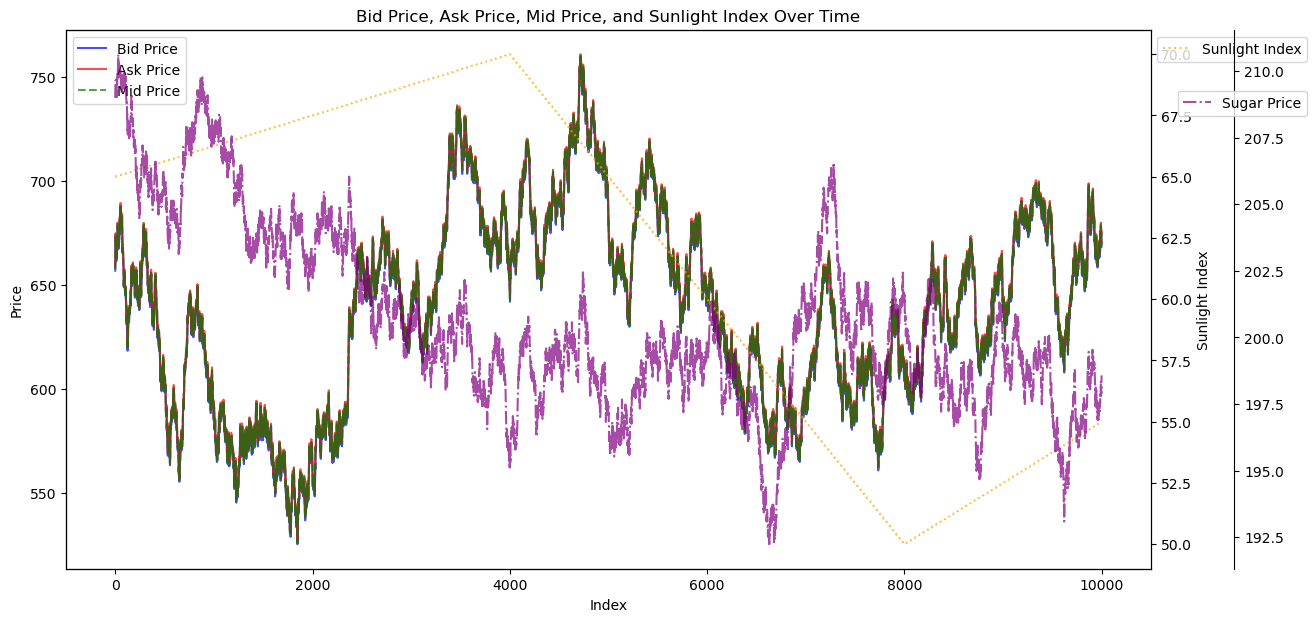

In [95]:
# Plot bidPrice and askPrice over time and their mid:
fig, ax1 = plt.subplots(figsize=(14, 7))

prices = prices_day_2
# Primary y-axis for bidPrice, askPrice, and midPrice
ax1.plot(prices['bidPrice'], label='Bid Price', color='blue', alpha=0.7)
ax1.plot(prices['askPrice'], label='Ask Price', color='red', alpha=0.7)
ax1.plot((prices['bidPrice'] + prices['askPrice']) / 2, label='Mid Price', color='green', linestyle='--', alpha=0.7)
ax1.set_xlabel('Index')
ax1.set_ylabel('Price')
ax1.legend(loc='upper left')

# Secondary y-axis for sunlightIndex
ax2 = ax1.twinx()
ax2.plot(prices['sunlightIndex'], label='Sunlight Index', color='orange', linestyle=':', alpha=0.7)
ax2.set_ylabel('Sunlight Index')
ax2.legend(loc='upper right', bbox_to_anchor=(1.15, 1))

# Third y-axis for sugarPrice
ax3 = ax1.twinx()
ax3.spines['right'].set_position(('outward', 60))  # Offset the third y-axis
ax3.plot(prices['sugarPrice'], label='Sugar Price', color='purple', linestyle='-.', alpha=0.7)
ax3.legend(loc='upper right', bbox_to_anchor=(1.15, 0.9))

plt.title('Bid Price, Ask Price, Mid Price, and Sunlight Index Over Time')
plt.show()

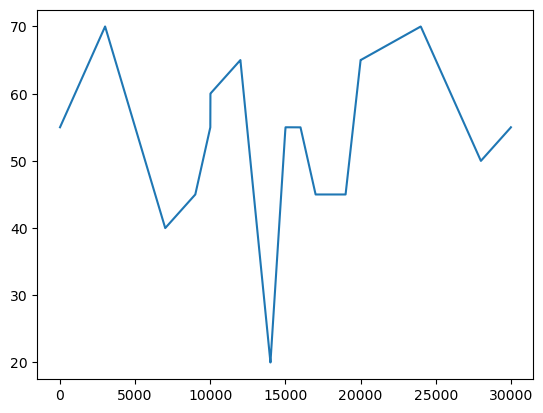

In [ ]:
plt.plot(prices["sunlightIndex"])

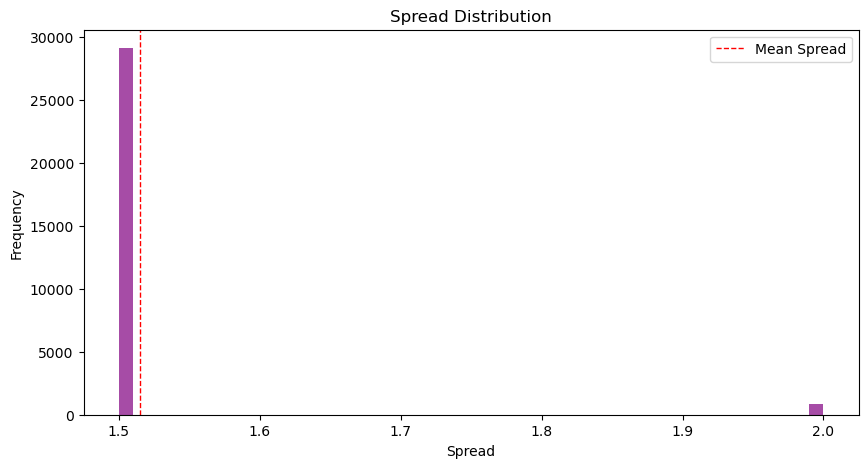

In [16]:
#Plot spread distribution:
plt.figure(figsize=(10, 5))
plt.hist(prices['askPrice'] - prices['bidPrice'], bins=50, alpha=0.7, color='purple')       
plt.title('Spread Distribution')
plt.xlabel('Spread')
plt.ylabel('Frequency')
plt.axvline(prices['askPrice'].mean() - prices['bidPrice'].mean(), color='red', linestyle='dashed', linewidth=1, label='Mean Spread')
plt.legend()
plt.show()

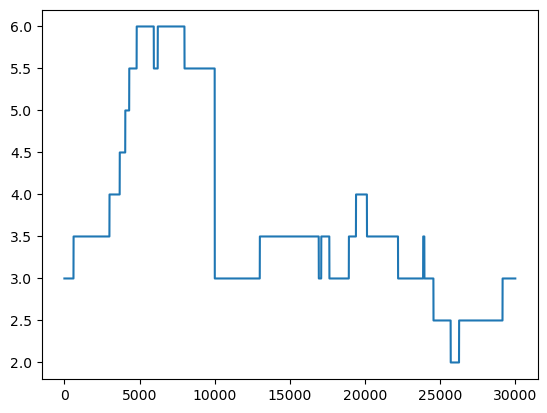

In [78]:
plt.plot(-df["importTariff"])

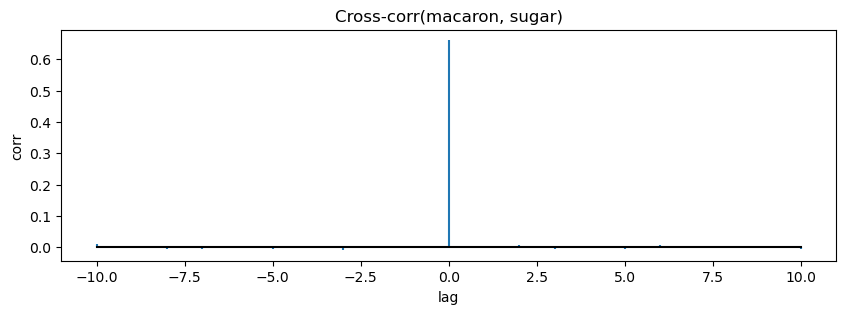

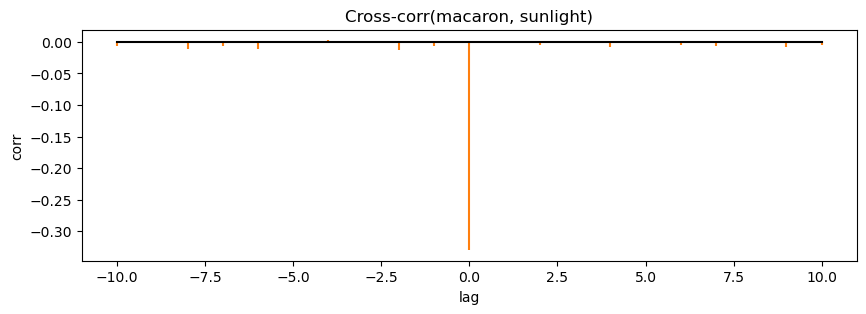

In [70]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

df = prices.copy()
df['midPrice'] = 0.5*(df['bidPrice'] + df['askPrice'])

df['mac_ret']   = np.log(df['midPrice']).diff()
df['sugar_ret'] = np.log(df['sugarPrice']).diff()

df['sun_diff']  = df['sunlightIndex'].diff()

df = df.dropna() 
max_lag = 10
lags    = np.arange(-max_lag, max_lag+1)

cc_sugar = [
    df['mac_ret'].corr(df['sugar_ret'].shift(l)) 
    for l in lags
]
cc_sun = [
    df['mac_ret'].corr(df['sun_diff'].shift(l)) 
    for l in lags
]

# plot them
plt.figure(figsize=(10,3))
plt.stem(lags, cc_sugar, basefmt='k-', linefmt='C0-', markerfmt=' ')
plt.title("Cross‐corr(macaron, sugar)"); plt.xlabel("lag"); plt.ylabel("corr")
plt.show()

plt.figure(figsize=(10,3))
plt.stem(lags, cc_sun, basefmt='k-', linefmt='C1-', markerfmt=' ')
plt.title("Cross‐corr(macaron, sunlight)"); plt.xlabel("lag"); plt.ylabel("corr")
plt.show()


Final PnL: 1.5963
Approx Sharpe: 0.21
Win rate: 47.12%


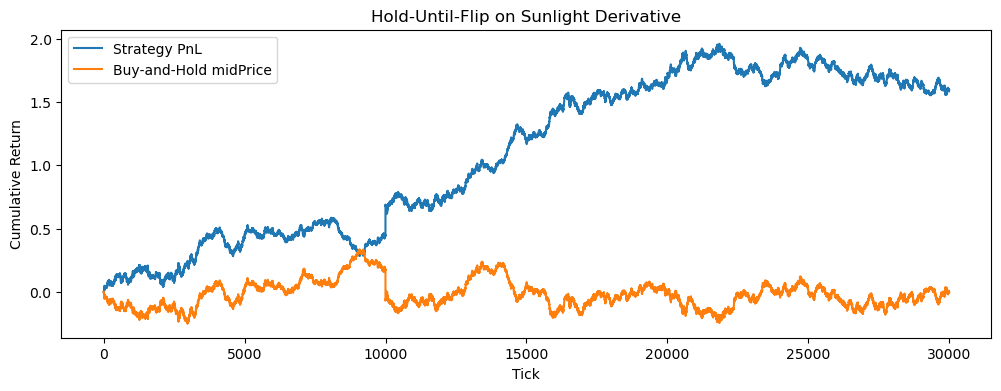

Number of position flips (trades): 11


In [92]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 0) LOAD & PREPARE
# --------------------------------------------------------------------
# assume `prices` has ['bidPrice','askPrice','sunlightIndex'] on a simple index
df = prices.copy()

# macaron mid‐price & return
df['midPrice'] = 0.5*(df['bidPrice'] + df['askPrice'])
df['mac_ret']  = np.log(df['midPrice']).diff()

# sunlight derivative
df['sun_deriv'] = df['sunlightIndex'].diff()

# drop the NaNs created by diff()
df = df.dropna().reset_index(drop=True)


# 1) BUILD A “HOLD UNTIL FLIP” POSITION
# --------------------------------------------------------------------
# raw sign of derivative: +1, 0, or -1
df['sign_raw'] = -np.sign(df['sun_deriv'])

# whenever sign_raw == 0, keep the previous non‐zero sign (ffill);
# if the very first few are 0, we treat them as 0 (flat).
df['position'] = df['sign_raw'].replace(0, np.nan).ffill().fillna(0)

# shift by 1 to avoid look‐ahead (we only act on the previous tick’s signal)
df['position'] = df['position'].shift(1).fillna(0)


# 2) COMPUTE STRATEGY RETURNS
# --------------------------------------------------------------------
df['strat_ret'] = df['position'] * df['mac_ret']


# 3) PERFORMANCE METRICS
# --------------------------------------------------------------------
# cumulative PnL
df['cum_pnl'] = df['strat_ret'].cumsum()

# Sharpe (annualized proxy; adjust freq to your tick rate)
sharpe = df['strat_ret'].mean() / df['strat_ret'].std() * np.sqrt(252)

# simple win‑rate
win_rate = (df['strat_ret'] > 0).mean()

print(f"Final PnL: {df['cum_pnl'].iloc[-1]:.4f}")
print(f"Approx Sharpe: {sharpe:.2f}")
print(f"Win rate: {win_rate:.2%}")


# 4) PLOTTING
# --------------------------------------------------------------------
plt.figure(figsize=(12,4))
plt.plot(df['cum_pnl'], label='Strategy PnL')
plt.plot(df['mac_ret'].cumsum(), label='Buy‐and‐Hold midPrice')
plt.legend()
plt.title("Hold‑Until‑Flip on Sunlight Derivative")
plt.xlabel("Tick")
plt.ylabel("Cumulative Return")
plt.show()


# 5) OPTIONAL DIAGNOSTICS: how many trades?
num_trades = (df['position'].diff().abs() > 0).sum()
print(f"Number of position flips (trades): {num_trades}")
